# Northwind SQL Analysis Report
This notebook presents an exploratory analysis of the Northwind dataset, a classic sample database that simulates an international food and beverage distribution company. Using SQL for querying and Python (pandas and matplotlib) for analysis and visualization, the report answers a series of targeted business questions related to customer behavior, supplier activity, product performance, and revenue patterns.

Each section includes:

- A focused business question

- A SQL query to retrieve the necessary data

- A pandas DataFrame for data manipulation

- Visualizations for clarity and insight (where applicable)

- An interpretation based on the findings

The goal is to demonstrate how structured data analysis can support strategic business decisions through accessible, evidence-based reporting.

In [2]:
# Import Libraries

import sqlite3

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Connect to the Database

# TODO: Set up a connection the "Market.db" database
conn = sqlite3.connect("db/Market.db")

# TODO: Set up the cursor
cur = conn.cursor()


### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [4]:
# Check available tables in the database
cur.execute("""
    SELECT COUNT(*) 
    FROM Products 
    WHERE Price < 10; -- filtering products based on their 'Price' field (less than €10)
""")

# Fetch and print result
rows = cur.fetchall() # Return all rows within the query as a list of tuples [(11,)]
under_10 = rows[0][0] # Get the first value from the first row in the tuples
print(f"Number of products priced under €10: {under_10}")

# Find the total number of products
cur.execute("""
    SELECT COUNT(*) 
    FROM Products;
""")

# Fetch and print result
rows = cur.fetchall() # Return all rows within the query as a list of tuples [(77,)]
total_products = rows[0][0] # Get the first value from the first row in the tuples
print(f"Total number of products: {total_products}")

# Calculate the percentage of products priced under €10
percentage_under_10 = (under_10 / total_products) * 100
print(f"Percentage of products priced under €10: {percentage_under_10:.2f}%")

Number of products priced under €10: 11
Total number of products: 77
Percentage of products priced under €10: 14.29%


**Interpretation:** Out of the 77 total products in inventory, 11 products are priced under €10. This represents approximately 14.29% of the entire catalog. While the majority of our products are above this price point, there are still lower-cost items. This may be   an opportunity to expand the affordable selection or promote budget-friendly options to price-sensitive customers.

### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [5]:
# TODO: Write a SQL query which will answer the question above.
cur.execute("""
    SELECT Country, COUNT(*) AS SupplierCount
    FROM Suppliers
    GROUP BY Country
    ORDER BY SupplierCount DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cur.fetchall()  # Return all rows within the query as a list of tuples
for country, count in rows:
    print(f"{country}: {count} suppliers")

USA: 4 suppliers
Germany: 3 suppliers
France: 3 suppliers
UK: 2 suppliers
Sweden: 2 suppliers
Japan: 2 suppliers
Italy: 2 suppliers
Canada: 2 suppliers
Australia: 2 suppliers
Spain: 1 suppliers
Singapore: 1 suppliers
Norway: 1 suppliers
Netherlands: 1 suppliers
Finland: 1 suppliers
Denmark: 1 suppliers
Brazil: 1 suppliers


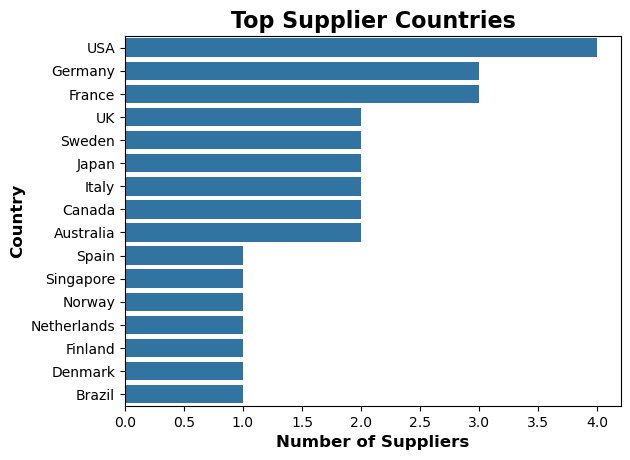

In [6]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country','SupplierCount'])

# TODO: Generate a visualization on this dataframe
sns.barplot(data=df, x='SupplierCount', y='Country')
plt.title('Top Supplier Countries', fontsize=16, fontweight='bold')
plt.xlabel('Number of Suppliers', fontsize=12, fontweight='bold')
plt.ylabel('Country', fontsize=12, fontweight='bold')
plt.show()

**Interpretation:** While the supplier base spans multiple countries, a portion is concentrated in just a few regions. The country with the highest number of suppliers is the United States, with 4 suppliers, followed by Germany and France, each with 3 suppliers and so on. These regions may provide stability and established relationships, but can be an issue if there conflicts such as shipping issues, policy changes or politics.

### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [7]:
# TODO: Write a SQL query which will answer the question above.
cur.execute("""
    SELECT Country, COUNT(*) AS CustomerCount
    FROM Customers
    GROUP BY Country
    ORDER BY CustomerCount DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cur.fetchall()  # Return all rows within the query as a list of tuples
for country, count in rows:
    print(f"{country}: {count} suppliers")

USA: 13 suppliers
Germany: 11 suppliers
France: 11 suppliers
Brazil: 9 suppliers
UK: 7 suppliers
Spain: 5 suppliers
Mexico: 5 suppliers
Venezuela: 4 suppliers
Italy: 3 suppliers
Canada: 3 suppliers
Argentina: 3 suppliers
Switzerland: 2 suppliers
Sweden: 2 suppliers
Portugal: 2 suppliers
Finland: 2 suppliers
Denmark: 2 suppliers
Belgium: 2 suppliers
Austria: 2 suppliers
Poland: 1 suppliers
Norway: 1 suppliers
Ireland: 1 suppliers


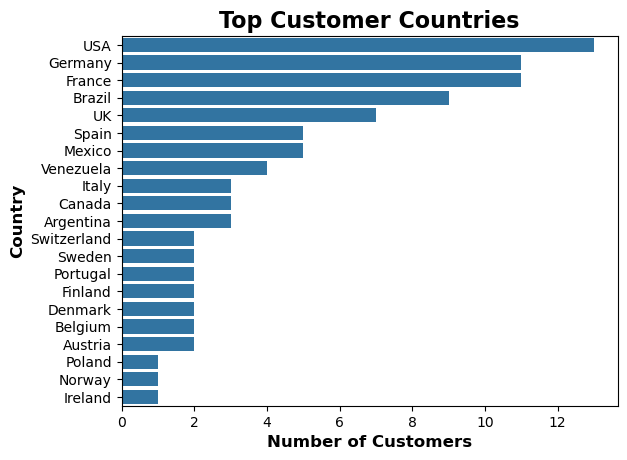

In [8]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country','CustomerCount'])

# TODO: Generate a visualization on this dataframe
sns.barplot(data=df, x='CustomerCount', y='Country')
plt.title('Top Customer Countries', fontsize=16, fontweight='bold')
plt.xlabel('Number of Customers', fontsize=12, fontweight='bold')
plt.ylabel('Country', fontsize=12, fontweight='bold')
plt.show()

**Interpretation:** The distribution shows that while our customer base is globally distributed, it is particularly concentrated in North America and Western Europe. The largest share of customers comes from the United States, with 13 customers, followed closely by Germany and France, each with 11 customers. Other prominent countries include Brazil (9), the United Kingdom (7), and Spain and Mexico, each with 5. The concentration of customers in the United States, Germany, and France may reflect historical business ties, established distribution networks, or targeted outreach efforts in those markets. In contrast, the growing number of customers in countries like Brazil and Mexico suggests increasing interest outside of traditional markets. This shift could be due to changing demand patterns and highlights the value of further expansion into emerging regions.

### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [9]:
# TODO: Write a SQL query which will answer the question above.
cur.execute("""
    SELECT p.ProductName, SUM(od.Quantity) AS TotalQuantity -- Calculate total quantity sold per product
    FROM OrderDetails od  -- OrderDetails shows how many of each product was ordered (Quantity)
    JOIN Products p ON od.ProductID = p.ProductID -- Join OrderDetails with Products to get ProductName since OrderDetails only has ProductID
    GROUP BY p.ProductName 
    ORDER BY TotalQuantity ASC -- Sort by total quantity sold in ascending order
    LIMIT 20; -- Get the bottom 20 products by quantity sold
""")

# TODO: Fetch your list of tuples and print it out
rows = cur.fetchall()
for product, quantity in rows:
    print(f"{product}: {quantity} units sold")

Laughing Lumberjack Lager: 5 units sold
Røgede sild: 15 units sold
Gustaf's Knäckebröd: 18 units sold
Mishi Kobe Niku: 20 units sold
Genen Shouyu: 25 units sold
Uncle Bob's Organic Dried Pears: 25 units sold
Queso Manchego La Pastora: 27 units sold
Grandma's Boysenberry Spread: 36 units sold
Gravad lax: 39 units sold
Röd Kaviar: 45 units sold
Filo Mix: 48 units sold
Mascarpone Fabioli: 52 units sold
Chocolade: 70 units sold
Valkoinen suklaa: 70 units sold
NuNuCa Nuß-Nougat-Creme: 71 units sold
Singaporean Hokkien Fried Mee: 77 units sold
Aniseed Syrup: 80 units sold
Ikura: 85 units sold
Louisiana Hot Spiced Okra: 90 units sold
Schoggi Schokolade: 90 units sold


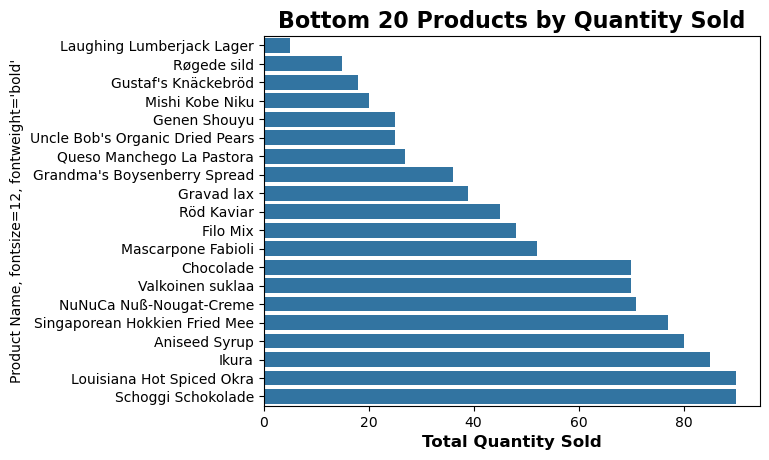

In [10]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=["ProductName", "TotalQuantity"])

# TODO: Generate a visualization on this dataframe
sns.barplot(data=df, x="TotalQuantity", y="ProductName")
plt.title("Bottom 20 Products by Quantity Sold",fontsize=16, fontweight='bold')
plt.xlabel("Total Quantity Sold", fontsize=12, fontweight='bold')
plt.ylabel("Product Name, fontsize=12, fontweight='bold'")
plt.show()

**Interpretation:** The data reveals that several products have very low sales volume, with Laughing Lumberjack Lager selling only 5 units sold, and others products such as Røgede sild, Gustaf’s Knäckebröd, and Mishi Kobe Niku range from 15 to 20 units sold. These low sales suggest that these products may either have low attraction to the customer base, less availability or potentially too expensive. Identifying the least popular items is useful for managing inventory and preventing overstock in these products. This can let us know whether to adjust promotional efforts or remove underperforming items to make room for higher demand products.

### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [11]:
# TODO: Write a SQL query which will answer the question above.
# Revenue = Quantity * Price. Quantity comes from OrderDetails, and Price comes from Products

cur.execute("""
    SELECT p.ProductName, SUM(od.Quantity * p.Price) AS TotalRevenue -- Calculate total revenue per product save as new column TotalRevenue
    FROM OrderDetails od
    JOIN Products p ON od.ProductID = p.ProductID -- Join OrderDetails with Products
    GROUP BY p.ProductName
    ORDER BY TotalRevenue ASC; -- Sort by total revenue in ascending order
""")


# TODO: Fetch your list of tuples and print it out
rows = cur.fetchall()
for product, revenue in rows:
    print(f"{product}: €{revenue:.2f} revenue")


Laughing Lumberjack Lager: €70.00 revenue
Røgede sild: €142.50 revenue
Filo Mix: €336.00 revenue
Gustaf's Knäckebröd: €378.00 revenue
Genen Shouyu: €387.50 revenue
Konbu: €552.00 revenue
Röd Kaviar: €675.00 revenue
Guaraná Fantástica: €711.00 revenue
Uncle Bob's Organic Dried Pears: €750.00 revenue
Geitost: €790.00 revenue
Aniseed Syrup: €800.00 revenue
Chocolade: €892.50 revenue
Grandma's Boysenberry Spread: €900.00 revenue
Zaanse koeken: €959.50 revenue
NuNuCa Nuß-Nougat-Creme: €994.00 revenue
Gravad lax: €1014.00 revenue
Queso Manchego La Pastora: €1026.00 revenue
Singaporean Hokkien Fried Mee: €1078.00 revenue
Rhönbräu Klosterbier: €1116.00 revenue
Valkoinen suklaa: €1137.50 revenue
Jack's New England Clam Chowder: €1341.35 revenue
Original Frankfurter grüne Soße: €1404.00 revenue
Sir Rodney's Scones: €1470.00 revenue
Tunnbröd: €1485.00 revenue
Louisiana Hot Spiced Okra: €1530.00 revenue
Sasquatch Ale: €1540.00 revenue
Mascarpone Fabioli: €1664.00 revenue
Teatime Chocolate Biscuits

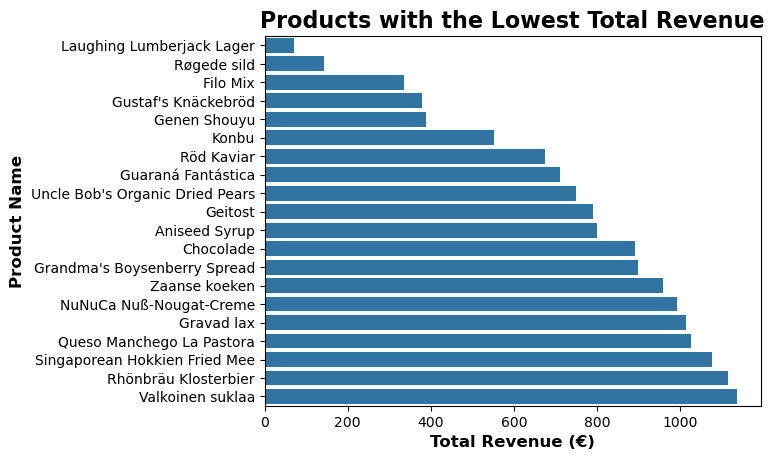

In [12]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=["ProductName", "TotalRevenue"])

# TODO: Generate a visualization on this dataframe
sns.barplot(data=df.head(20), x="TotalRevenue", y="ProductName")
plt.title("Products with the Lowest Total Revenue", fontsize=16, fontweight='bold')
plt.xlabel("Total Revenue (€)", fontsize=12, fontweight='bold')
plt.ylabel("Product Name", fontsize=12, fontweight='bold')
plt.show()

**Interpretation:** The product(s) that generated the lowest total revenue was Laughing Lumberjack Lager, with €70.00, followed by Røgede sild (€142.50), Filo Mix (€336.00), and Gustaf’s Knäckebröd (€378.00). These products have the lowest sales performance when measured by total revenue.

For some cases, low revenue may be a result of limited demand or a lack of visibility among customers. This offers insight into where to improve product marketing, reevaluate pricing, or consider discontinuing the product. It also helps prioritize resources toward higher performing items. 

### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [13]:
# TODO: Write a SQL query which will answer the question above.
cur.execute("""
    SELECT c.Country, COUNT(o.OrderID) AS OrderCount -- Count the number of orders per country
    FROM Orders o                                    -- Orders table include CustomerID (who placed the order), but not the country
    JOIN Customers c ON o.CustomerID = c.CustomerID  -- Join Orders with Customers to get the country of the customer
    GROUP BY c.Country
    ORDER BY OrderCount DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cur.fetchall()
for country, count in rows:
    print(f"{country}: {count} orders")

USA: 29 orders
Germany: 25 orders
Brazil: 19 orders
France: 18 orders
Austria: 13 orders
UK: 12 orders
Venezuela: 9 orders
Mexico: 9 orders
Canada: 9 orders
Finland: 8 orders
Sweden: 7 orders
Spain: 7 orders
Italy: 7 orders
Ireland: 6 orders
Portugal: 5 orders
Switzerland: 4 orders
Denmark: 4 orders
Belgium: 2 orders
Poland: 1 orders
Norway: 1 orders
Argentina: 1 orders


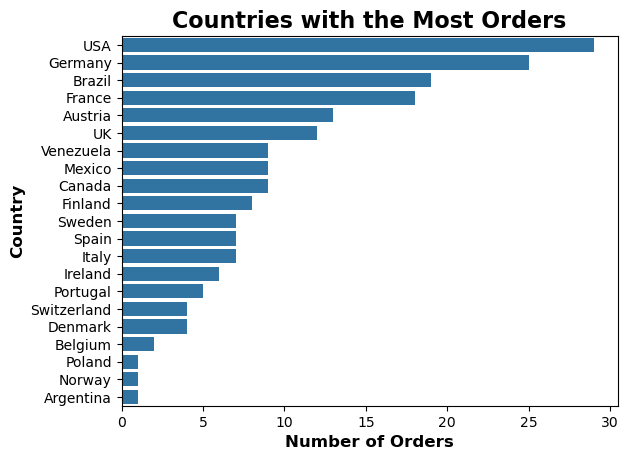

In [14]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=["Country", "OrderCount"])

# TODO: Generate a visualization on this dataframe
sns.barplot(data=df, x="OrderCount", y="Country")
plt.title("Countries with the Most Orders", fontsize=16, fontweight='bold')
plt.xlabel("Number of Orders", fontsize=12, fontweight='bold')
plt.ylabel("Country", fontsize=12, fontweight='bold')
plt.show()

**Interpretation:** The USA tops the list with 29 orders, showing it is one of the strongest markets. Germany (25 orders), Brazil (19), and France (18) also have a solid number of orders. Countries like Austria, the UK, Mexico, Canada, and Venezuela all had a steady presence as well.

Most of the activity is coming from North America and Western Europe, which makes sense if that is where the focused efforts are. That said, countries with just a few orders like Poland, Norway, and Argentina might be worth exploring more closely to show  where we can improve in opprotunities.

### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
cur.execute("""
    SELECT c.Country, COUNT(*) AS CustomersWithoutOrders
    FROM Customers c
    LEFT JOIN Orders o ON c.CustomerID = o.CustomerID   -- Left join Customers with Orders to include all customers, even those without orders
    WHERE o.OrderID IS NULL                             -- Filter for customers with no orders
    GROUP BY c.Country
    ORDER BY CustomersWithoutOrders DESC;               -- Sort by number of customers without orders in descending order
""")

# TODO: Fetch your list of tuples and print it out
rows = cur.fetchall()
for country, count in rows:
    print(f"{country}: {count} customers with no orders")

USA: 5 customers with no orders
France: 4 customers with no orders
Germany: 2 customers with no orders
Argentina: 2 customers with no orders
UK: 1 customers with no orders
Spain: 1 customers with no orders
Canada: 1 customers with no orders
Belgium: 1 customers with no orders


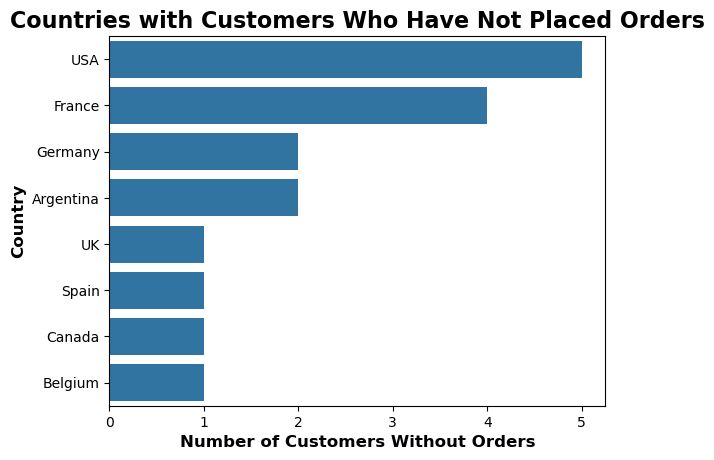

In [16]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=["Country", "CustomersWithoutOrders"])

# TODO: Generate a visualization on this dataframe
sns.barplot(data=df, x="CustomersWithoutOrders", y="Country")
plt.title("Countries with Customers Who Have Not Placed Orders", fontsize=16, fontweight='bold')
plt.xlabel("Number of Customers Without Orders", fontsize=12, fontweight='bold')
plt.ylabel("Country", fontsize=12, fontweight='bold')
plt.show()

**Interpretation:** Although there is a strong global customer base, not all the customers are actively placing orders. The USA leads this list with 5 inactive customers, followed by France (4), Germany (2), and Argentina (2) (and so forth). This can be an opportunoty for these countries to do some targeted outreach or personalized marketing to convert inactive customers into active buyers.

### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [17]:
# TODO: Write a SQL query which will answer the question above.
cur.execute("""
    SELECT s.SupplierName, COUNT(*) AS OrderCount -- Count the number of orders per supplier 
    FROM OrderDetails od                      -- OrderDetails shows which products were ordered, but not the supplier   
    JOIN Products p ON od.ProductID = p.ProductID      -- Join OrderDetails with Products to get product details
    JOIN Suppliers s ON p.SupplierID = s.SupplierID    -- Join Products with Suppliers to get supplier details
    GROUP BY s.SupplierName                            -- Group by supplier name to count orders per supplier   
    ORDER BY OrderCount DESC;
""")
# TODO: Fetch your list of tuples and print it out
rows = cur.fetchall()
for supplier, count in rows:
    print(f"{supplier}: {count} orders")

Plutzer Lebensmittelgroßmärkte AG: 42 orders
Pavlova, Ltd.: 40 orders
Specialty Biscuits, Ltd.: 33 orders
Norske Meierier: 32 orders
Formaggi Fortini s.r.l.: 31 orders
Gai pâturage: 26 orders
Exotic Liquid: 21 orders
Pasta Buttini s.r.l.: 20 orders
New Orleans Cajun Delights: 20 orders
Ma Maison: 19 orders
Karkki Oy: 19 orders
G'day, Mate: 19 orders
New England Seafood Cannery: 17 orders
Mayumi's: 17 orders
Leka Trading: 17 orders
Bigfoot Breweries: 16 orders
Heli Süßwaren GmbH & Co. KG: 15 orders
Forêts d'érables: 15 orders
Aux joyeux ecclésiastiques: 15 orders
Svensk Sjöföda AB: 14 orders
Tokyo Traders: 12 orders
Refrescos Americanas LTDA: 11 orders
Cooperativa de Quesos 'Las Cabras': 11 orders
Nord-Ost-Fisch Handelsgesellschaft mbH: 8 orders
Lyngbysild: 8 orders
PB Knäckebröd AB: 6 orders
Grandma Kelly's Homestead: 6 orders
Zaanse Snoepfabriek: 4 orders
Escargots Nouveaux: 4 orders


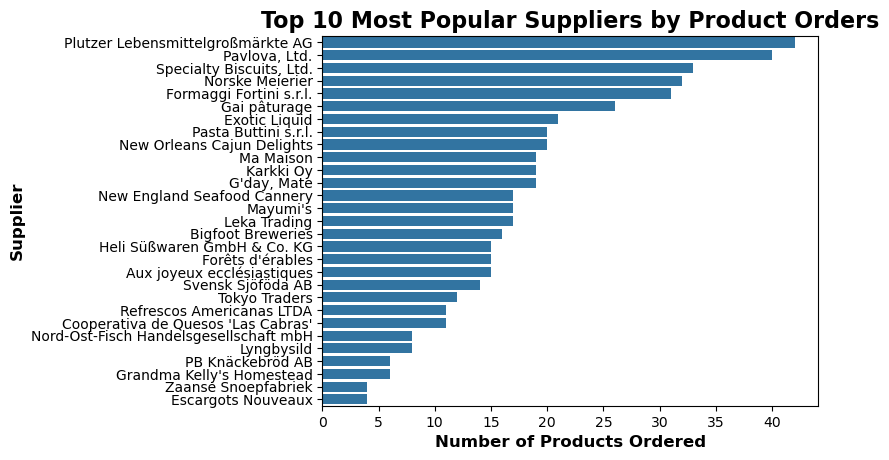

In [18]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=["SupplierName", "OrderCount"])

# TODO: Generate a visualization on this dataframe
sns.barplot(data=df,x="OrderCount", y="SupplierName")
plt.title("Top 10 Most Popular Suppliers by Product Orders", fontsize=16, fontweight='bold')
plt.xlabel("Number of Products Ordered", fontsize=12, fontweight='bold')
plt.ylabel("Supplier", fontsize=12, fontweight='bold')
plt.show()

**Interpretation:** The most frequently ordered supplier was Plutzer Lebensmittelgroßmärkte AG, whose products appeared in 42 orders, followed by Pavlova, Ltd. with 40 orders, and Specialty Biscuits, Ltd. with 33 orders. A few other suppliers like Norske Meierier, Formaggi Fortini s.r.l., and Gai pâturage did well, each with more than 25 product orders. This highlights which vendors are favored by customers whether its popularity, cost or availability. Knowing which suppliers are in high demand help strengthen relationships, ensure consistency, availability and purchasing priorities.

## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

The countries with the highest number of customers are:

- **United States:**  13 customers
- **Germany:**  11 customers
- **France:**  11 customers
- **Brazil:**  9 customers
- **United Kingdom:**  7 customers

*(This data was found by grouping the `Customers table` by country and counting the number of entries for each.)*

When comparing this to supplier data from the `Suppliers table`, we observe:

- **United States:**  4 suppliers
- **Germany:**  3 suppliers
- **France:**  3 suppliers
- **United Kingdom, Sweden, Japan, Italy, Canada, Australia:**  2 suppliers each

There is some overlap between countries with high customer and supplier counts. The United States, Germany, and France appear in both categories, suggesting they are key markets for both demand and supply. However, a higher number of customers does not always correspond to a higher number of suppliers. For instance, Brazil has 9 customers but only 1 supplier, while the United States has the most customers and more suppliers than others, but not a proportional increase. This may indicates that the relationship between customer count and supplier count is not directly correlated. Some countries serve primarily as large consumer markets, while others may be more focused on product distribution and supply.

**Calculate Correlation between Customers and Suppliers**

In [19]:
# Combined data of customers and suppliers by country
data = {
    'Country': [
        'USA', 'Germany', 'France', 'Brazil', 'UK', 'Spain', 'Mexico', 'Venezuela',
        'Italy', 'Canada', 'Argentina', 'Switzerland', 'Sweden', 'Portugal',
        'Finland', 'Denmark', 'Belgium', 'Austria', 'Poland', 'Norway', 'Ireland', 'Japan', 'Australia', 'Singapore', 'Netherlands'
    ],
    'Customers': [
        13, 11, 11, 9, 7, 5, 5, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0
    ],
    'Suppliers': [
        4, 3, 3, 1, 2, 1, 0, 0, 2, 2, 0, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 2, 2, 1, 1
    ]
}

df_customers_suppliers = pd.DataFrame(data)

print(df_customers_suppliers)

# Step 2: Calculate correlation coefficient
correlation = df_customers_suppliers['Customers'].corr(df_customers_suppliers['Suppliers'])
print(f"\nPearson correlation coefficient: {correlation:.2f}")

# Define interpretation function
def interpret_correlation(r):
    if r >= 0.9:
        return "very strong positive correlation"
    elif r >= 0.7:
        return "strong positive correlation"
    elif r >= 0.5:
        return "moderate positive correlation"
    elif r >= 0.3:
        return "weak positive correlation"
    elif r > 0:
        return "very weak positive correlation"
    elif r == 0:
        return "no correlation"
    elif r > -0.3:
        return "very weak negative correlation"
    elif r > -0.5:
        return "weak negative correlation"
    elif r > -0.7:
        return "moderate negative correlation"
    elif r > -0.9:
        return "strong negative correlation"
    else:
        return "very strong negative correlation"
    
print(f"Interpretation: This is a {interpret_correlation(correlation)}.")

        Country  Customers  Suppliers
0           USA         13          4
1       Germany         11          3
2        France         11          3
3        Brazil          9          1
4            UK          7          2
5         Spain          5          1
6        Mexico          5          0
7     Venezuela          4          0
8         Italy          3          2
9        Canada          3          2
10    Argentina          3          0
11  Switzerland          2          0
12       Sweden          2          2
13     Portugal          2          0
14      Finland          2          1
15      Denmark          2          1
16      Belgium          2          0
17      Austria          2          0
18       Poland          1          1
19       Norway          1          1
20      Ireland          1          0
21        Japan          0          2
22    Australia          0          2
23    Singapore          0          1
24  Netherlands          0          1

Pearson cor

After exploring the relationship between customer presence and supplier presence, we compared the number of customers and suppliers per country to see whether the assumption of not being directly correlated is correct.

The resulting Pearson correlation coefficient is `0.59`, suggesting a moderate positive correlation. This indicates that countries with more customers often also have more suppliers but the relationship is not absolute.

For instance, countries like Mexico and Venezuela have multiple customers but no suppliers, while Japan and Australia have suppliers but no customers. These mismatches suggest that while there's some overlap, customer demand and supplier sourcing are also influenced by other factors such as logistics, cost advantages, or regional distribution. 

In conslusion, countries with more customers tend to have more suppliers. The moderate correlation between customers and suppliers suggests to strengthen customer relations by engaging customers more deeply where suppliers are already active, or exploring new supplier partnerships in areas with high customer demand.

### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

The product with the lowest order quantity is `Laughing Lumberjack Lager, with only 5 units sold`. In terms of total revenue, it generated just `€70.00`, making it not only the least ordered product but also one of the lowest revenue contributors Most of the bottom-ranking products by quantity also fall at the bottom of the revenue list. In otehr words, there may be a relationship between how often a product is sold and how much revenue it brings in.

*(The least popular data was found by joining the OrderDetails and Products tables, grouping by product name, and summing quantities.)*
*(Revenue was calculated by joining OrderDetails and Products, and aggregating Quantity * UnitPrice per product)*

To confirm this relationship, the Pearson correlation coefficient was calculated between total quantity sold and total revenue for the 10 least popular products. The result was:

- **Correlation coefficient:** 0.76

- **Interpretation:** This indicates a strong positive correlation

In other words, for low sale products, as order quantity increases, so does revenue, even possibly small improvements in popularity could increase earnings.

**Calculate Correlation between Less Popular Products & Reveune**

In [20]:
# Data from earlier analysis
df_product_rev = {
    'Product': [
        'Laughing Lumberjack Lager', 'Røgede sild', 'Gustaf\'s Knäckebröd',
        'Mishi Kobe Niku', 'Genen Shouyu', 'Uncle Bob\'s Organic Dried Pears',
        'Queso Manchego La Pastora', 'Grandma\'s Boysenberry Spread',
        'Gravad lax', 'Röd Kaviar'
    ],
    'TotalQuantity': [5, 15, 18, 20, 25, 25, 27, 36, 39, 45],
    'TotalRevenue': [70.0, 142.5, 378.0, 600.0, 387.5, 750.0, 1026.0, 900.0, 1014.0, 675.0]
}

df_product_rev = pd.DataFrame(df_product_rev)

print(df_product_rev)

# Calculate correlation
correlation = df_product_rev['TotalQuantity'].corr(df_product_rev['TotalRevenue'])

# Interpretation function
def interpret_corr(value):
    """
    Returns a qualitative interpretation of a Pearson correlation coefficient.

    Parameters:
    r (float): A numeric correlation value between -1 and 1.

    Returns:
    str: A descriptive label indicating the strength and direction of the correlation:
         - r >=  0.9   → very strong positive correlation
         - r >=  0.7   → strong positive correlation
         - r >=  0.5   → moderate positive correlation
         - r >=  0.3   → weak positive correlation
         - r >   0     → very weak positive correlation
         - r ==  0     → no correlation
         - r >  -0.3   → very weak negative correlation
         - r >  -0.5   → weak negative correlation
         - r >  -0.7   → moderate negative correlation
         - r >  -0.9   → strong negative correlation
         - r <= -0.9   → very strong negative correlation
    """
    if value >= 0.9:
        return "very strong positive"
    elif value >= 0.7:
        return "strong positive"
    elif value >= 0.5:
        return "moderate positive"
    elif value >= 0.3:
        return "weak positive"
    elif value > 0:
        return "very weak positive"
    elif value == 0:
        return "no correlation"
    elif value > -0.3:
        return "very weak negative"
    elif value > -0.5:
        return "weak negative"
    elif value > -0.7:
        return "moderate negative"
    elif value > -0.9:
        return "strong negative"
    else:
        return "very strong negative"

# Output
print(f"Pearson correlation coefficient: {correlation:.2f}")
print(f"Interpretation: This is a {interpret_corr(correlation)} correlation.")


                           Product  TotalQuantity  TotalRevenue
0        Laughing Lumberjack Lager              5          70.0
1                      Røgede sild             15         142.5
2              Gustaf's Knäckebröd             18         378.0
3                  Mishi Kobe Niku             20         600.0
4                     Genen Shouyu             25         387.5
5  Uncle Bob's Organic Dried Pears             25         750.0
6        Queso Manchego La Pastora             27        1026.0
7     Grandma's Boysenberry Spread             36         900.0
8                       Gravad lax             39        1014.0
9                       Röd Kaviar             45         675.0
Pearson correlation coefficient: 0.76
Interpretation: This is a strong positive correlation.


### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

The country with the most orders is USA, with 29 orders. 
*(This data was collected by joining the Customers and Orders tables and grouping the results by country.)*
Additional countries with high number of orders:
- **Germany:** 25 orders

- **Brazil:** 19 orders

- **France:** 18 orders

- **Austria:** 13 orders

When we compare this to the number of customers in each country who did not place any orders (using a left join on Customers and Orders):

- **United States:** 5 customers with no orders

- **France:** 4 customers with no orders

- **Germany:** 2 customers with no orders

- **Argentina:** 2 customers with no orders

A Pearson correlation coefficient of `0.65` was found between total order count and number of non-ordering customers, indicating a moderate positive correlation. This suggests that countries with more overall customers (and so more orders) also tend to have more non-ordering customers, likely due to a larger customer base rather than disengagement.

**Calculate Correlation between More Customers Order & Non-ordering Customers**

In [21]:
# Combined data: countries with orders and non-ordering customers
combined_data = {
    'Country': [
        'USA', 'Germany', 'Brazil', 'France', 'Austria', 'UK', 'Venezuela',
        'Mexico', 'Canada', 'Finland', 'Sweden', 'Spain', 'Italy', 'Ireland',
        'Portugal', 'Switzerland', 'Denmark', 'Belgium', 'Poland', 'Norway',
        'Argentina'
    ],
    'Orders': [
        29, 25, 19, 18, 13, 12, 9, 9, 9, 8, 7, 7, 7, 6, 5, 4, 4, 2, 1, 1, 1
    ],
    'NonOrderingCustomers': [
        5, 2, 0, 4, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2
    ]
}

df_orders_nonorders = pd.DataFrame(combined_data)

print(df_orders_nonorders)

# Correlation calculation
corr_value = df_orders_nonorders['Orders'].corr(df_orders_nonorders['NonOrderingCustomers'])

def interpret_corr(r):
    """
    Returns a qualitative interpretation of a Pearson correlation coefficient.

    Parameters:
    r (float): A numeric correlation value between -1 and 1.

    Returns:
    str: A descriptive label indicating the strength and direction of the correlation:
         - r >=  0.9   → very strong positive correlation
         - r >=  0.7   → strong positive correlation
         - r >=  0.5   → moderate positive correlation
         - r >=  0.3   → weak positive correlation
         - r >   0     → very weak positive correlation
         - r ==  0     → no correlation
         - r >  -0.3   → very weak negative correlation
         - r >  -0.5   → weak negative correlation
         - r >  -0.7   → moderate negative correlation
         - r >  -0.9   → strong negative correlation
         - r <= -0.9   → very strong negative correlation
    """
    if r >= 0.9:
        return "very strong positive correlation"
    elif r >= 0.7:
        return "strong positive correlation"
    elif r >= 0.5:
        return "moderate positive correlation"
    elif r >= 0.3:
        return "weak positive correlation"
    elif r > 0:
        return "very weak positive correlation"
    elif r == 0:
        return "no correlation"
    elif r > -0.3:
        return "very weak negative correlation"
    elif r > -0.5:
        return "weak negative correlation"
    elif r > -0.7:
        return "moderate negative correlation"
    elif r > -0.9:
        return "strong negative correlation"
    else:
        return "very strong negative correlation"

print(f"Pearson correlation coefficient: {corr_value:.2f}")
print(f"Interpretation: This is a {interpret_corr(corr_value)}.")


        Country  Orders  NonOrderingCustomers
0           USA      29                     5
1       Germany      25                     2
2        Brazil      19                     0
3        France      18                     4
4       Austria      13                     0
5            UK      12                     1
6     Venezuela       9                     0
7        Mexico       9                     0
8        Canada       9                     1
9       Finland       8                     0
10       Sweden       7                     0
11        Spain       7                     1
12        Italy       7                     0
13      Ireland       6                     0
14     Portugal       5                     0
15  Switzerland       4                     0
16      Denmark       4                     0
17      Belgium       2                     1
18       Poland       1                     0
19       Norway       1                     0
20    Argentina       1           

### Question 4

Which supplier has the most orders? Which evidence supports your answer?

The supplier with the highest number of total orders is `Plutzer Lebensmittelgroßmärkte AG`.

To better understand the factors contributing to this lead, several supporting metrics were analyzed. These provide insights into whether the supplier’s popularity stems from pricing, product variety, high demand, or customer interaction.

#### Total Revenue by Supplier

This shows the total revenue generated per supplier across all orders, high order count does not necessarily mean high earnings.

In [22]:
cur.execute("""
    SELECT s.SupplierName, ROUND(SUM(od.Quantity * p.Price),2) AS TotalRevenue -- Calculate total revenue per supplier
    FROM Suppliers s
    JOIN Products p ON s.SupplierID = p.SupplierID -- Join Products with Suppliers to get supplier details
    JOIN OrderDetails od ON p.ProductID = od.ProductID -- Join OrderDetails to get
    GROUP BY s.SupplierName -- Group by supplier name
    ORDER BY TotalRevenue DESC; -- Sort by total revenue in descending order    
""")

# Fetch and Convert to DataFrame
rows = cur.fetchall()
df_total_revenue = pd.DataFrame(rows, columns=["SupplierName", "TotalRevenue"])
print(df_total_revenue)

                              SupplierName  TotalRevenue
0               Aux joyeux ecclésiastiques      67764.50
1        Plutzer Lebensmittelgroßmärkte AG      37487.87
2                            Pavlova, Ltd.      37067.20
3                             Gai pâturage      33650.00
4                         Forêts d'érables      19043.50
5                              G'day, Mate      17207.80
6                  Formaggi Fortini s.r.l.      16785.00
7                          Norske Meierier      14638.00
8                 Specialty Biscuits, Ltd.      14208.70
9                     Pasta Buttini s.r.l.      13498.00
10             Heli Süßwaren GmbH & Co. KG      12190.36
11                            Leka Trading      10796.10
12              New Orleans Cajun Delights      10321.90
13                           Exotic Liquid      10141.00
14                               Karkki Oy       8301.50
15                       Bigfoot Breweries       8252.00
16                             

**Interpretation:** Plutzer Lebensmittelgroßmärkte AG has the second-highest total revenue at €37,487.87. The top spot goes to Aux joyeux ecclésiastiques with €67,764.50, which is more than €30,000 higher. This means Plutzer brings in a little over half as much revenue as the top supplier.

Even though Plutzer does not generate the most revenue overall, it still outperforms all other suppliers except one. This suggests that Plutzer may not sell the most expensive products but still has strong sales volume. Suppliers like Pavlova, Ltd. and Gai pâturage come close in revenue but do not surpass it.

This points to Plutzer being a strong, consistent performer. Its success likely comes from having products that are in steady demand, reaching a wide range of customers rather than relying on high priced items.

#### Average Product Price
This helps price by supplier reveals pricing strategies. Explore whether the supplier is more affordable. 

In [23]:
cur.execute("""
    SELECT s.SupplierName, ROUND(AVG(p.Price),2) AS AvgProductPrice -- Calculate average price per supplier
    FROM Suppliers s
    JOIN Products p ON s.SupplierID = p.SupplierID -- Join Products with Suppliers to get supplier details
    GROUP BY s.SupplierName
    ORDER BY AvgProductPrice DESC; -- Sort by average price in descending order
""")

# Fetch and Convert to DataFrame
rows = cur.fetchall()
df_avg_price = pd.DataFrame(rows, columns=["SupplierName", "AvgProductPrice"])
print(df_avg_price)


                              SupplierName  AvgProductPrice
0               Aux joyeux ecclésiastiques           140.75
1                            Tokyo Traders            46.00
2        Plutzer Lebensmittelgroßmärkte AG            44.68
3                             Gai pâturage            44.50
4                         Forêts d'érables            38.90
5                            Pavlova, Ltd.            35.57
6                Grandma Kelly's Homestead            31.67
7                              G'day, Mate            30.93
8              Heli Süßwaren GmbH & Co. KG            29.71
9       Cooperativa de Quesos 'Las Cabras'            29.50
10                    Pasta Buttini s.r.l.            28.75
11                Specialty Biscuits, Ltd.            28.18
12                            Leka Trading            26.48
13                 Formaggi Fortini s.r.l.            26.43
14  Nord-Ost-Fisch Handelsgesellschaft mbH            25.89
15              New Orleans Cajun Deligh

**Interpretation:** Plutzer Lebensmittelgroßmärkte AG ranks third in terms of average product price at €44.68. This puts it just below Tokyo Traders at €46.00 and far behind Aux joyeux ecclésiastiques, which leads with an average price of €140.75.

This shows that while Plutzer’s products are on the higher side price wise, they are still much more affordable than the most expensive supplier. That balance may help explain its strong performance. It offers quality products without being too costly, which can appeal to more customers.

Compared to suppliers with lower prices, Plutzer seems to find a good middle ground. Its pricing might be one reason why it receives a lot of orders and earns solid revenue.

#### Product Variety by Supplier

This metric measures how many distinct products each supplier offers. A supplier with more products may naturally get more orders due to variety

In [24]:
cur.execute("""
    SELECT s.SupplierName, COUNT(p.ProductID) AS ProductCount -- Count the number of products per supplier
    FROM Suppliers s
    JOIN Products p ON s.SupplierID = p.SupplierID -- Join Products with Suppliers to get supplier details
    GROUP BY s.SupplierName 
    ORDER BY ProductCount DESC; -- Sort by product count in descending order
""")

# Fetch and Convert to DataFrame
rows = cur.fetchall()
df_product_count = pd.DataFrame(rows, columns=["SupplierName", "ProductCount"])
print(df_product_count)

                              SupplierName  ProductCount
0        Plutzer Lebensmittelgroßmärkte AG             5
1                            Pavlova, Ltd.             5
2                 Specialty Biscuits, Ltd.             4
3               New Orleans Cajun Delights             4
4                            Tokyo Traders             3
5                        Svensk Sjöföda AB             3
6                          Norske Meierier             3
7                                 Mayumi's             3
8                             Leka Trading             3
9                                Karkki Oy             3
10             Heli Süßwaren GmbH & Co. KG             3
11               Grandma Kelly's Homestead             3
12                             G'day, Mate             3
13                 Formaggi Fortini s.r.l.             3
14                           Exotic Liquid             3
15                       Bigfoot Breweries             3
16                     Zaanse S

**Interpretation:** Plutzer Lebensmittelgroßmärkte AG is tied for the highest number of products offered, with a total of five. Only one other supplier, Pavlova Ltd., matches this count. Most other suppliers offer between one and four products.

Offering a wider range of products gives Plutzer more opportunities to receive orders, especially if their items meet different customer needs. The variety might be a key factor in its strong order volume and revenue, as it increases the chances of matching with customer preferences.

#### Top-Ordered Products per Supplier

Analyzing the highest demand products tied to each supplier helps explain order volume. If a supplier consistently provides fast moving (popular) items, that contributes to higher order counts.

In [25]:
cur.execute("""
    SELECT s.SupplierName, p.ProductName, SUM(od.Quantity) AS TotalQuantity -- Calculate total quantity sold per product per supplier
    From Suppliers s
    JOIN Products p ON s.SupplierID = p.SupplierID -- Join Products with Suppliers to get supplier details
    JOIN OrderDetails od ON p.ProductID = od.ProductID -- Join OrderDetails to get
    GROUP BY s.SupplierName, p.ProductName -- Group by supplier and product name
    ORDER BY s.SupplierName, TotalQuantity DESC; -- Sort by supplier and total quantity sold
""")

# Fetch and Convert to DataFrame
rows = cur.fetchall()
df_top_products = pd.DataFrame(rows, columns=["SupplierName", "ProductName", "TotalQuantity"])
print(df_top_products)

# Filter for rows where the supplier is Plutzer
plutzer_products = df_top_products[df_top_products['SupplierName'] == 'Plutzer Lebensmittelgroßmärkte AG']
print(plutzer_products)


                  SupplierName                ProductName  TotalQuantity
0   Aux joyeux ecclésiastiques           Chartreuse verte            266
1   Aux joyeux ecclésiastiques              Côte de Blaye            239
2            Bigfoot Breweries             Steeleye Stout            369
3            Bigfoot Breweries              Sasquatch Ale            110
4            Bigfoot Breweries  Laughing Lumberjack Lager              5
..                         ...                        ...            ...
72               Tokyo Traders              Longlife Tofu            186
73               Tokyo Traders                      Ikura             85
74               Tokyo Traders            Mishi Kobe Niku             20
75         Zaanse Snoepfabriek              Zaanse koeken            101
76         Zaanse Snoepfabriek                  Chocolade             70

[77 rows x 3 columns]
                         SupplierName                      ProductName  \
59  Plutzer Lebensmittelgro

**Interpretation:** Plutzer Lebensmittelgroßmärkte AG supplies several products that have seen strong demand. Their most popular item, Rössle Sauerkraut, was ordered 189 times, followed closely by Thüringer Rostbratwurst (168), Wimmers gute Semmelknödel (167), and Rhönbräu Klosterbier (144). These numbers reflect a healthy volume of consistent interest across a variety of products, all contributing to their overall order count.

Although Plutzer does not have the single highest selling product among all suppliers, the cumulative performance across multiple moderately high demand items may help explain why they consistently rank near the top in order volume and revenue. Their offerings appear to meet steady, reliable customer interest without relying on a single runaway best seller.

In [26]:
# Rank all products globally by quantity sold (regardless of supplier)
df_top_products["GlobalRank"] = df_top_products["TotalQuantity"].rank(method="min", ascending=False)
# Filter only Plutzer's products and show their global rank
plutzer_ranked = df_top_products[df_top_products["SupplierName"] == "Plutzer Lebensmittelgroßmärkte AG"]
print(plutzer_ranked.sort_values(by="GlobalRank"))

                         SupplierName                      ProductName  \
59  Plutzer Lebensmittelgroßmärkte AG                Rössle Sauerkraut   
60  Plutzer Lebensmittelgroßmärkte AG          Thüringer Rostbratwurst   
61  Plutzer Lebensmittelgroßmärkte AG        Wimmers gute Semmelknödel   
62  Plutzer Lebensmittelgroßmärkte AG             Rhönbräu Klosterbier   
63  Plutzer Lebensmittelgroßmärkte AG  Original Frankfurter grüne Soße   

    TotalQuantity  GlobalRank  
59            189        24.0  
60            168        33.0  
61            167        35.0  
62            144        45.0  
63            108        51.0  


**Interpretation:** Plutzer Lebensmittelgroßmärkte AG has five products that rank within the top 60 across all suppliers by quantity sold. Its most ordered product, Rössle Sauerkraut, ranks 24th overall, while the rest fall between 33rd and 51st. This shows that Plutzer does not have any single product dominating the top of the sales chart, unlike some suppliers with products ranked in the top 10. Instead, its success appears to come from multiple consistently performing items, each generating solid demand. This pattern suggests that Plutzer’s strength lies in reliable performance across a balanced product line, rather than depending on one or two exceptionally high demand items. That consistency likely contributes to its high overall order count and second-place revenue ranking.

#### Unique Customer Count per 

This figure reflects how many different customers place orders with each supplier. A high count may indicate strong market reach. 

In [27]:
cur.execute("""
    SELECT s.SupplierName, COUNT(DISTINCT o.CustomerID) AS UniqueCustomerCount
    FROM Suppliers s
    JOIN Products p ON s.SupplierID = p.SupplierID -- Join Products with Suppliers to get supplier details
    JOIN OrderDetails od ON p.ProductID = od.ProductID -- Join OrderDetails to get product details
    JOIN Orders o ON od.OrderID = o.OrderID -- Join Orders to get customer details
    GROUP BY s.SupplierName -- Group by supplier name to count unique customers
    ORDER BY UniqueCustomerCount DESC; -- Sort by unique customer count in descending order
""")

# Fetch and Convert to DataFrame
rows = cur.fetchall()
df_unique_customers = pd.DataFrame(rows, columns=["SupplierName", "UniqueCustomerCount"])
print(df_unique_customers)

                              SupplierName  UniqueCustomerCount
0        Plutzer Lebensmittelgroßmärkte AG                   32
1                 Specialty Biscuits, Ltd.                   28
2                          Norske Meierier                   28
3                            Pavlova, Ltd.                   23
4                  Formaggi Fortini s.r.l.                   22
5                             Gai pâturage                   21
6                                Ma Maison                   17
7                            Exotic Liquid                   17
8               New Orleans Cajun Delights                   16
9                             Leka Trading                   16
10                               Karkki Oy                   16
11                    Pasta Buttini s.r.l.                   15
12             New England Seafood Cannery                   15
13                             G'day, Mate                   15
14                       Bigfoot Breweri

**Interpretation:** Plutzer Lebensmittelgroßmärkte AG stands out with the highest number of unique customers at 32, the largest customer base among all suppliers. The next closest suppliers, such as Specialty Biscuits, Ltd. and Norske Meierier, each serve 28 customers. This broad reach shows that Plutzer appeals to a wide variety of buyers, not just a small group of frequent purchasers. It suggests strong market presence and trust, as more customers are choosing to order from them at least once. Having a large and diverse customer base also increases the chances of sustained order volume and repeat business over time, which likely supports Plutzer’s lead in total orders and strong performance in overall revenue.

#### Repeat Order Rate

This help capture customer satisfaction and product reliability. A high percentage indicates ongoing customer engagement. 

In [28]:
cur.execute("""
    SELECT s.SupplierName, p.ProductName, -- Calculate total quantity sold per product per supplier
           COUNT(DISTINCT o.CustomerID) AS UniqueCustomers, -- Count unique customers who ordered each product
           COUNT(o.OrderID) AS TotalOrders,  -- Count total orders for each product
           (COUNT(o.OrderID) * 100.0 / COUNT(DISTINCT o.CustomerID)) AS RepeatOrderPercentage -- Calculate percentage of repeat orders 
    FROM Suppliers s
    JOIN Products p ON s.SupplierID = p.SupplierID -- Join Products with Suppliers to get supplier details
    JOIN OrderDetails od ON p.ProductID = od.ProductID -- Join OrderDetails to get      
    JOIN Orders o ON od.OrderID = o.OrderID -- Join Orders to get customer details
    GROUP BY s.SupplierName, p.ProductName -- Group by supplier and product name
    ORDER BY s.SupplierName, RepeatOrderPercentage DESC; -- Sort by supplier and repeat order percentage
""")

# Fetch and Convert to DataFrame
rows = cur.fetchall()
df_repeat_orders = pd.DataFrame(rows, columns=["SupplierName", "ProductName", "UniqueCustomers", "TotalOrders", "RepeatOrderPercentage"])
print(df_repeat_orders)


                  SupplierName                ProductName  UniqueCustomers  \
0   Aux joyeux ecclésiastiques              Côte de Blaye                7   
1   Aux joyeux ecclésiastiques           Chartreuse verte                8   
2            Bigfoot Breweries             Steeleye Stout                8   
3            Bigfoot Breweries              Sasquatch Ale                6   
4            Bigfoot Breweries  Laughing Lumberjack Lager                1   
..                         ...                        ...              ...   
72               Tokyo Traders              Longlife Tofu                5   
73               Tokyo Traders            Mishi Kobe Niku                1   
74               Tokyo Traders                      Ikura                4   
75         Zaanse Snoepfabriek              Zaanse koeken                3   
76         Zaanse Snoepfabriek                  Chocolade                1   

    TotalOrders  RepeatOrderPercentage  
0             7       

In [29]:
# Filter for rows where the supplier is Plutzer
plutzer_repeat_orders = df_repeat_orders[df_repeat_orders['SupplierName'] == 'Plutzer Lebensmittelgroßmärkte AG']
print(plutzer_repeat_orders)

                         SupplierName                      ProductName  \
59  Plutzer Lebensmittelgroßmärkte AG  Original Frankfurter grüne Soße   
60  Plutzer Lebensmittelgroßmärkte AG        Wimmers gute Semmelknödel   
61  Plutzer Lebensmittelgroßmärkte AG          Thüringer Rostbratwurst   
62  Plutzer Lebensmittelgroßmärkte AG                Rössle Sauerkraut   
63  Plutzer Lebensmittelgroßmärkte AG             Rhönbräu Klosterbier   

    UniqueCustomers  TotalOrders  RepeatOrderPercentage  
59                7            8             114.285714  
60                7            7             100.000000  
61                9            9             100.000000  
62               10           10             100.000000  
63                8            8             100.000000  


**Interpretation:** All five of Plutzer’s products exhibit a 100% or higher repeat order rate, showing that each product has been reordered by customers who initially purchased them. The Original Frankfurter grüne Soße leads with a 114% repeat rate, meaning some customers placed more than one reorder. This level of customer return across every single product highlights a consistent track record of high satisfaction and reliable demand. It also positions Plutzer as a trusted supplier whose entire catalog resonates with buyers not just one or two bestsellers. Compared to other suppliers, where repeat rates may vary more widely between products, Plutzer stands out for its uniform strength across the board, reinforcing its position as a competitive and dependable partner in the market.

#### Product Category

This helps identifies how many different product categories a supplier spans. Checking if a supplier specializes in a specific product category, which may affect their order volume.

In [30]:
cur.execute("""
    SELECT s.SupplierName, c.CategoryName, COUNT(p.ProductID) AS ProductCount -- Count the number of products per supplier and category
    FROM Suppliers s
    JOIN Products p ON s.SupplierID = p.SupplierID -- Join Products with Suppliers to get
    JOIN Categories c ON p.CategoryID = c.CategoryID -- Join Products with Categories to get category details
    GROUP BY s.SupplierName, c.CategoryName -- Group by supplier and category
    ORDER BY s.SupplierName, ProductCount DESC; -- Sort by supplier and product count in descending order
""")

# Fetch and Convert to DataFrame
rows = cur.fetchall()
df_product_categories = pd.DataFrame(rows, columns=["SupplierName", "CategoryName", "ProductCount"])
print(df_product_categories)

                              SupplierName    CategoryName  ProductCount
0               Aux joyeux ecclésiastiques       Beverages             2
1                        Bigfoot Breweries       Beverages             3
2       Cooperativa de Quesos 'Las Cabras'  Dairy Products             2
3                       Escargots Nouveaux         Seafood             1
4                            Exotic Liquid       Beverages             2
5                            Exotic Liquid      Condiments             1
6                  Formaggi Fortini s.r.l.  Dairy Products             3
7                         Forêts d'érables     Confections             1
8                         Forêts d'érables      Condiments             1
9                              G'day, Mate         Produce             1
10                             G'day, Mate    Meat/Poultry             1
11                             G'day, Mate  Grains/Cereals             1
12                            Gai pâturage  Dairy P

In [31]:
# Filter for rows where the supplier is Plutzer
plutzer_categories = df_product_categories[df_product_categories['SupplierName'] == 'Plutzer Lebensmittelgroßmärkte AG']
print(plutzer_categories)

                         SupplierName    CategoryName  ProductCount
37  Plutzer Lebensmittelgroßmärkte AG         Produce             1
38  Plutzer Lebensmittelgroßmärkte AG    Meat/Poultry             1
39  Plutzer Lebensmittelgroßmärkte AG  Grains/Cereals             1
40  Plutzer Lebensmittelgroßmärkte AG      Condiments             1
41  Plutzer Lebensmittelgroßmärkte AG       Beverages             1


**Interpretation:** Plutzer Lebensmittelgroßmärkte AG offers products across five categories:
Produce, Meat/Poultry, Grains/Cereals, Condiments, and Beverages.

This makes Plutzer one of the more well-rounded suppliers, with a presence in multiple key areas. While many suppliers focus on one or two product types, Plutzer’s spread suggests it caters to a varied customer base and can meet a range of inventory needs.

This diversity likely gives Plutzer a few advantages:

- Increased flexibility in product offerings

- A greater chance of repeat business across categories

- A competitive competitor by not relying on a single market segment

Plutzer’s balanced category distribution may help explain its strong performance in revenue and sales volume.